# Hypothesis 2:
Crimes tend to increase around the holiday

import packages and read in csv

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
modified_boston = pd.read_csv('prep_data/modified_boston_crime.csv')

Create function for generate line chart with holidays labels.
Function is created by modifying codes in: https://www.kaggle.com/code/heesoo37/boston-crimes-starter-eda

In [2]:
def holiday_situation(year, data, low, high):
    """
    Generate line charts by crime counts with holiday labels

    :param year:an int of the year for query
    :param data:a dataframe of crime data
    :param low:an int for the lower limit of y-axis
    :param high:an int for the upper limit of y-axis
    :return:a line chart
    """
    grouped_date = data
    holidays = [year+'-01-01', # New Years Day
                         year+'-01-16', # MLK Day
                         year+'-03-17', # St. Patrick's Day
                         year+'-04-17', # Boston marathon
                         year+'-05-29', # Memorial Day
                         year+'-07-04', # Independence Day
                         year+'-09-04', # Labor Day
                         year+'-10-10', # Veterans Day
                         year+'-11-23', # Thanksgiving
                         year+'-12-25'] # Christmas
    holidays_names = ['NY','MLK','St Pats','Marathon','Mem','July 4','Labor','Vets','Thnx','Xmas']
    grouped_date['YEAR'] = grouped_date['OCCURRED_ON_DATE'].str[:4]
    grouped_date = grouped_date[grouped_date['YEAR']==year]
    grouped_date = grouped_date.groupby(['OCCURRED_ON_DATE']).size().reset_index(name='count')
    fig, ax = plt.subplots(figsize=(20,6))
    sns.lineplot(x='OCCURRED_ON_DATE',
                y='count',
                ax=ax,
                data=grouped_date)
    plt.xlabel('Year'+year)
    plt.vlines(holidays, low, high, alpha=1, color ='r')
    plt.xticks([])
    for i in range(len(holidays)):
        plt.text(x=holidays[i], y=high+2, s=holidays_names[i])

Generate line charts of year 2016, 2017 and 2018.

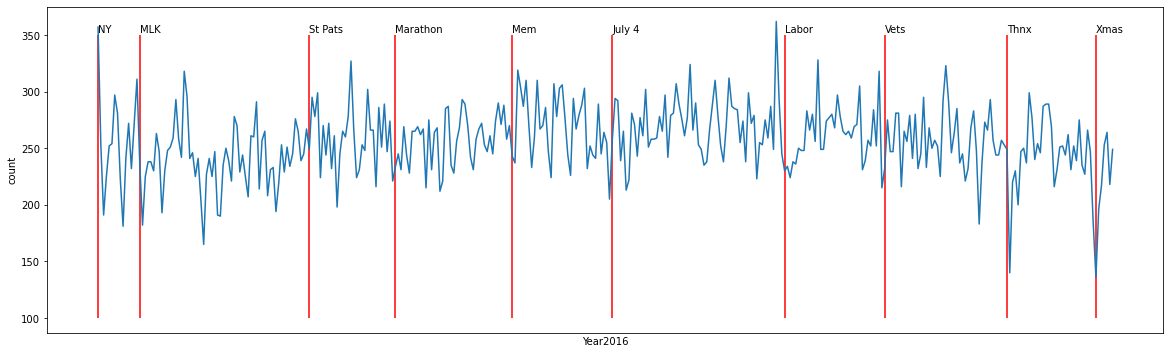

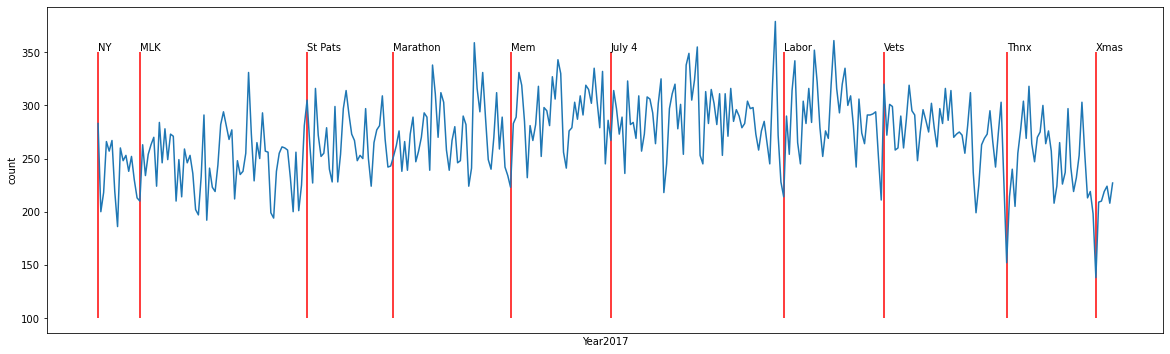

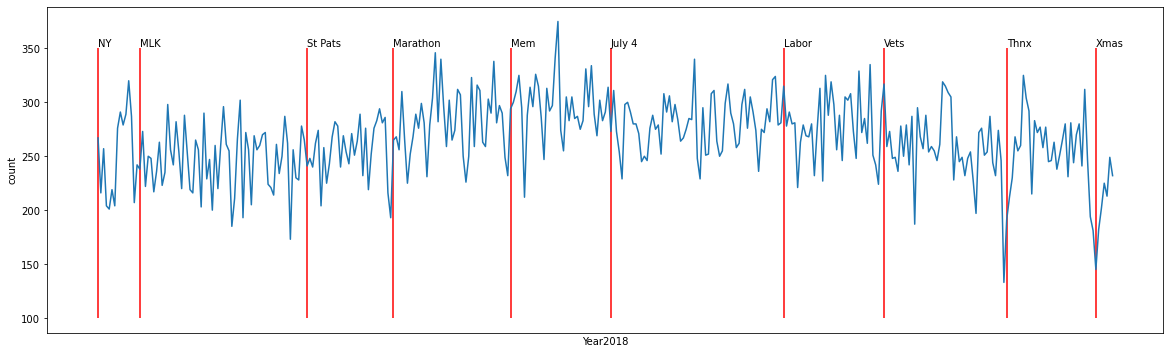

In [3]:
holiday_situation('2016',modified_boston,100,350)
holiday_situation('2017',modified_boston,100,350)
holiday_situation('2018',modified_boston,100,350)

# Conclusion:
Crimes tend to decrease during Christmas and Thanksgiving day

# Farther thinking:
Will the amount of various crimes change differently during hours, days or years?

Read in csv and reshape dataframe for hour, days and years.

In [4]:
df_boston = pd.read_csv('data/boston_crime.csv')

D:\anacoda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
def heat_map(df, time_unit):
    """
    Generate heat map by crime count and inputted time unit

    :param df: a dataframe of crime
    :param time_unit: a str which should only have value of 'hour', 'day' or 'year'
    :return: a heat map
    """
    if time_unit == 'year':
        grouped_df = df.groupby(['YEAR','OFFENSE_CODE_GROUP']).agg({'OFFENSE_CODE':'count'}).reset_index()
        grouped_year = grouped_df.pivot("OFFENSE_CODE_GROUP", "YEAR", "OFFENSE_CODE")
        ax = sns.heatmap(grouped_year)
    elif time_unit == 'day':
        grouped_day = df.groupby(['DAY_OF_WEEK','OFFENSE_CODE_GROUP']).agg({'OFFENSE_CODE':'count'}).reset_index()
        grouped_day = grouped_day.pivot("OFFENSE_CODE_GROUP", "DAY_OF_WEEK", "OFFENSE_CODE")
        ax = sns.heatmap(grouped_day)
    elif time_unit == 'hour':
        grouped_hour = df.groupby(['HOUR','OFFENSE_CODE_GROUP']).agg({'OFFENSE_CODE':'count'}).reset_index()
        grouped_hour = grouped_hour.pivot("OFFENSE_CODE_GROUP", "HOUR", "OFFENSE_CODE")
        ax = sns.heatmap(grouped_hour)
    else:
        return print('Please type in year, day or hour.')

Show the heatmap of various crimes change by years.

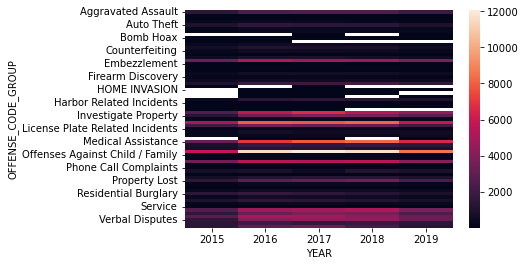

In [6]:
heat_map(df_boston, 'year')

Show the heatmap of various crimes change by days.

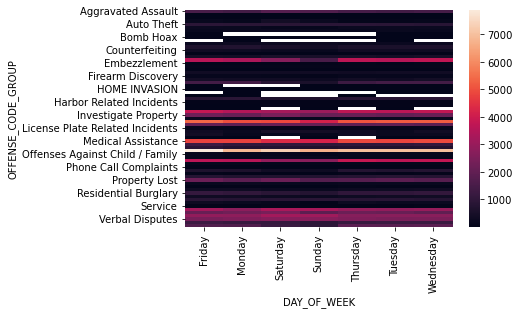

In [7]:
heat_map(df_boston, 'day')

Show the heatmap of various crimes change by hours.

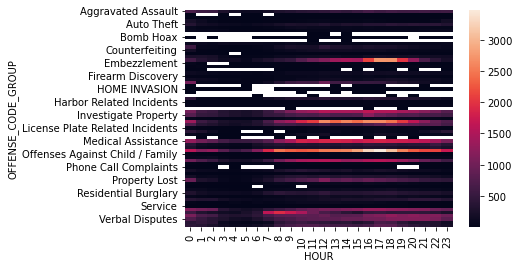

In [8]:
heat_map(df_boston, 'hour')

Read in original crime data of Denver.

In [9]:
df2 = pd.read_csv('data/marijuana_crime.csv')

Formalize time data and clean blank values of data of Denver.

In [10]:
df2 = df2[['OFFENSE_CATEGORY_ID','REPORTDATE','INCIDENT_ADDRESS']]
df2.columns=['OFFENSE_CODE_GROUP','OCCURRED_ON_DATE','STREET']
df2.dropna(axis=0, how='any', inplace=True)

In [11]:
df2['OFFENSE_CODE_GROUP'].unique()

array(['Drug Offenses', 'Burglary', 'Agg ASLT-Other',
       'Theft from Motor Vehicle', 'Larceny', 'Robbery-Street-Res',
       'Simple Assault', 'Criminal Mischief-Vehicle', 'All Other Crimes',
       'Criminal Mischief-Property', 'Robbery-Business',
       'Weapons Offense', 'Auto Theft', 'Agg ASLT-Firearm',
       'Criminal Mischief-Graffiti'], dtype=object)

In [12]:
ID_to_Group = {'Drug Offenses':'Drug Violation',
               'Burglary':'Burglary - No Property Taken',
               'Agg ASLT-Other':'Aggravated Assault',
               'Theft from Motor Vehicle':'Auto Theft',
               'Larceny':'Larceny',
               'Simple Assault':'Simple Assault',
               'Robbery-Street-Res':'Robbery',
               'Criminal Mischief-Vehicle':'Other',
               'All Other Crimes':'Other',
               'Robbery-Business':'Robbery',
               'Weapons Offense':'Firearm Discovery',
               'Auto Theft':'Auto Theft',
               'Agg ASLT-Firearm':'Firearm Violations',
               'Criminal Mischief-Graffiti':'Other'
               }
df2['OFFENSE_CODE_GROUP'].map(ID_to_Group)
def date_modify(date):
    month_list = {'JAN':'01','FEB':'02','MAR':'03','APR':'04','MAY':'05','JUN':'06','JUL':'07','AUG':'08','SEP':'09','OCT':'10','NOV':'11','DEC':'12'}
    date = str(date).split('-')
    month = month_list[date[1]]
    year = '20' + date[2]
    return year + '-' + month + '-' + date[0]
df2['OCCURRED_ON_DATE'] = df2['OCCURRED_ON_DATE'].apply(date_modify)

Output to csv.

In [13]:
df2.to_csv('prep_data/modified_marijuana_crime.csv', index = False)

Read in modified crime data of Denver.

In [14]:
df_denver = pd.read_csv('prep_data/modified_marijuana_crime.csv')

Build function for create columns of day of week.

In [15]:
def day_of_week(date):
    """
    return day of week as a str

    :param date: a str likes'2017-06-01'
    :return: str of day of week
    """
    weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    date = date.split('-')
    day = int(date[2])
    month = int(date[1])
    year = int(date[0])
    return weekday[datetime.date(day=day, month=month, year=year).weekday()]

In [16]:
df_denver['OFFENSE_CODE'] = df_denver['OFFENSE_CODE_GROUP']
df_denver['YEAR'] = df_denver['OCCURRED_ON_DATE'].str[:4]
df_denver['DAY_OF_WEEK'] = df_denver['OCCURRED_ON_DATE'].apply(day_of_week)

Show the heatmap of various crimes change by years.

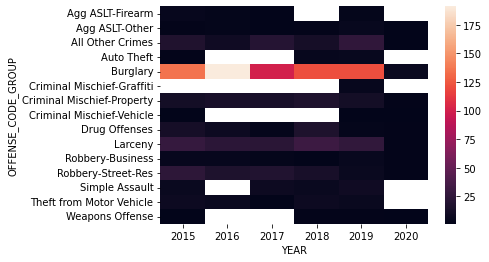

In [17]:
heat_map(df_denver, 'year')

Show the heatmap of various crimes change by days.

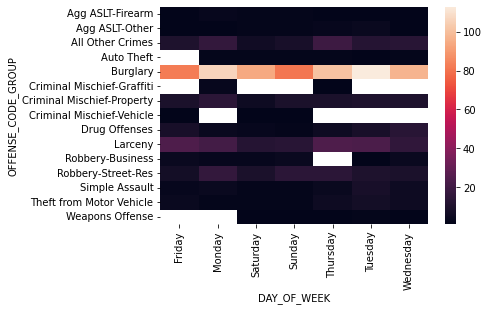

In [18]:
heat_map(df_denver, 'day')

# Conclusion:
Some types of crimes such as offenses against children/family and investigate property change differently during hours.